# DMDW - Mini Project - 2
### Author : Kapeel Suryavanshi (BT16CSE084, 19896)
## Topic : Classification
### Dataset Used: Red-Wine-Quality
### Algorithms Compared :
1. Support Vector Classifier (Linear SVM) 
2. Support Vector Classifier (rbf SVM)
3. Decision Tree
4. Random Forest
5. Logistic Regression
6. Linear Discriminant Analysis
7. Gaussian Naive Bayes
8. XGBoost
9. K-Nearest Neighbours (KNN)
10. Gradient Boosting Classifier

In [17]:
# Import all necessary files
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

##  Load Wine-Quality Dataset 

##### Dataset is loaded from the "red-wine-quality.csv" file

In [18]:
data = pd.read_csv('red-wine-quality.csv')
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Statistical study of the data

In [19]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
# Mean and Median According to Target Labels
data.groupby('quality').agg(['mean', 'median'])

fixed acidity        volatile acidity        citric acid         \
                 mean median             mean median        mean median   
quality                                                                   
3            8.360000   7.50         0.884500  0.845    0.171000  0.035   
4            7.779245   7.50         0.693962  0.670    0.174151  0.090   
5            8.167254   7.80         0.577041  0.580    0.243686  0.230   
6            8.347179   7.90         0.497484  0.490    0.273824  0.260   
7            8.872362   8.80         0.403920  0.370    0.375176  0.400   
8            8.566667   8.25         0.423333  0.370    0.391111  0.420   

        residual sugar        chlorides          ... total sulfur dioxide  \
                  mean median      mean  median  ...                 mean   
quality                                          ...                        
3             2.635000    2.1  0.122500  0.0905  ...            24.900000   
4             2.694340    2.1  0.090679  0.0800  ...            36.245283   
5             2.528855    2.2  0.092736  0.0810  ...            56.513950   
6             2.477194    2.2  0.084956  0.0780  ...            40.869906   
7             2.720603    2.3  0.076588  0.0730  ...            35.020101   
8             2.577778    2.1  0.068444  0.0705  ...            33.444444   

                 density                  pH        sulphates         \
        median      mean    median      mean median      mean median   
quality                                                                
3         15.0  0.997464  0.997565  3.398000   3.39  0.570000  0.545   
4         26.0  0.996542  0.996500  3.381509   3.37  0.596415  0.560   
5         47.0  0.997104  0.997000  3.304949   3.30  0.620969  0.580   
6         35.0  0.996615  0.996560  3.318072   3.32  0.675329  0.640   
7         27.0  0.996104  0.995770  3.290754   3.28  0.741256  0.740   
8         21.5  0.995212  0.994940  3.267222   3.23  0.767778  0.740   

           alcohol          
              mean  median  
quality                     
3         9.955000   9.925  
4        10.265094  10.000  
5         9.899706   9.700  
6        10.629519  10.500  
7        11.465913  11.500  
8        12.094444  12.150  

[6 rows x 22 columns]

In [21]:
# Standard Deviation According to Target Labels
data.groupby('quality').std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.122020,0.818009
4,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776
5,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521
6,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639
7,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933
8,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011


In [22]:
# Check for Missing Data
data[data.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Get the count of quality labels.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


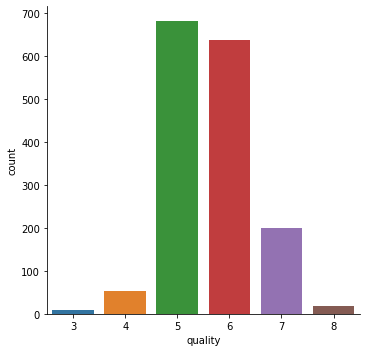

In [23]:
print(data['quality'].value_counts())
sns.factorplot('quality',data=data,kind='count')
plt.show()

###### We can see that most of the wines in this dataset seem to have quality scores of 5 or 6 .
We classify the wines based on quality even further to make classification easy :
- We modify the feature "quality" that divides the wines quality into "Good" or "Bad" giving them a value of "0" if wine quality is <= 6 or "1" if wine quality is > 6. 
- These becomes our target label now.

Good Wine Class: (217, 12)
Bad Wine Class: (1382, 12)


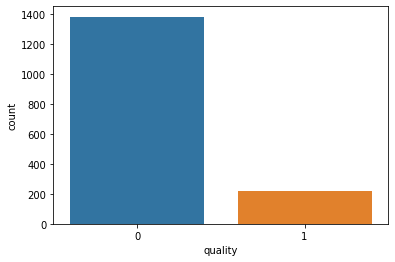

In [24]:
data['quality'] = [1 if each > 6 else 0 for each in data['quality']]

print("Good Wine Class:",data[data['quality'] == 1].shape)
print("Bad Wine Class:",data[data['quality'] == 0].shape)

sns.countplot(data['quality'])
plt.show()

### Correlation between the features

<Figure size 360x360 with 0 Axes>

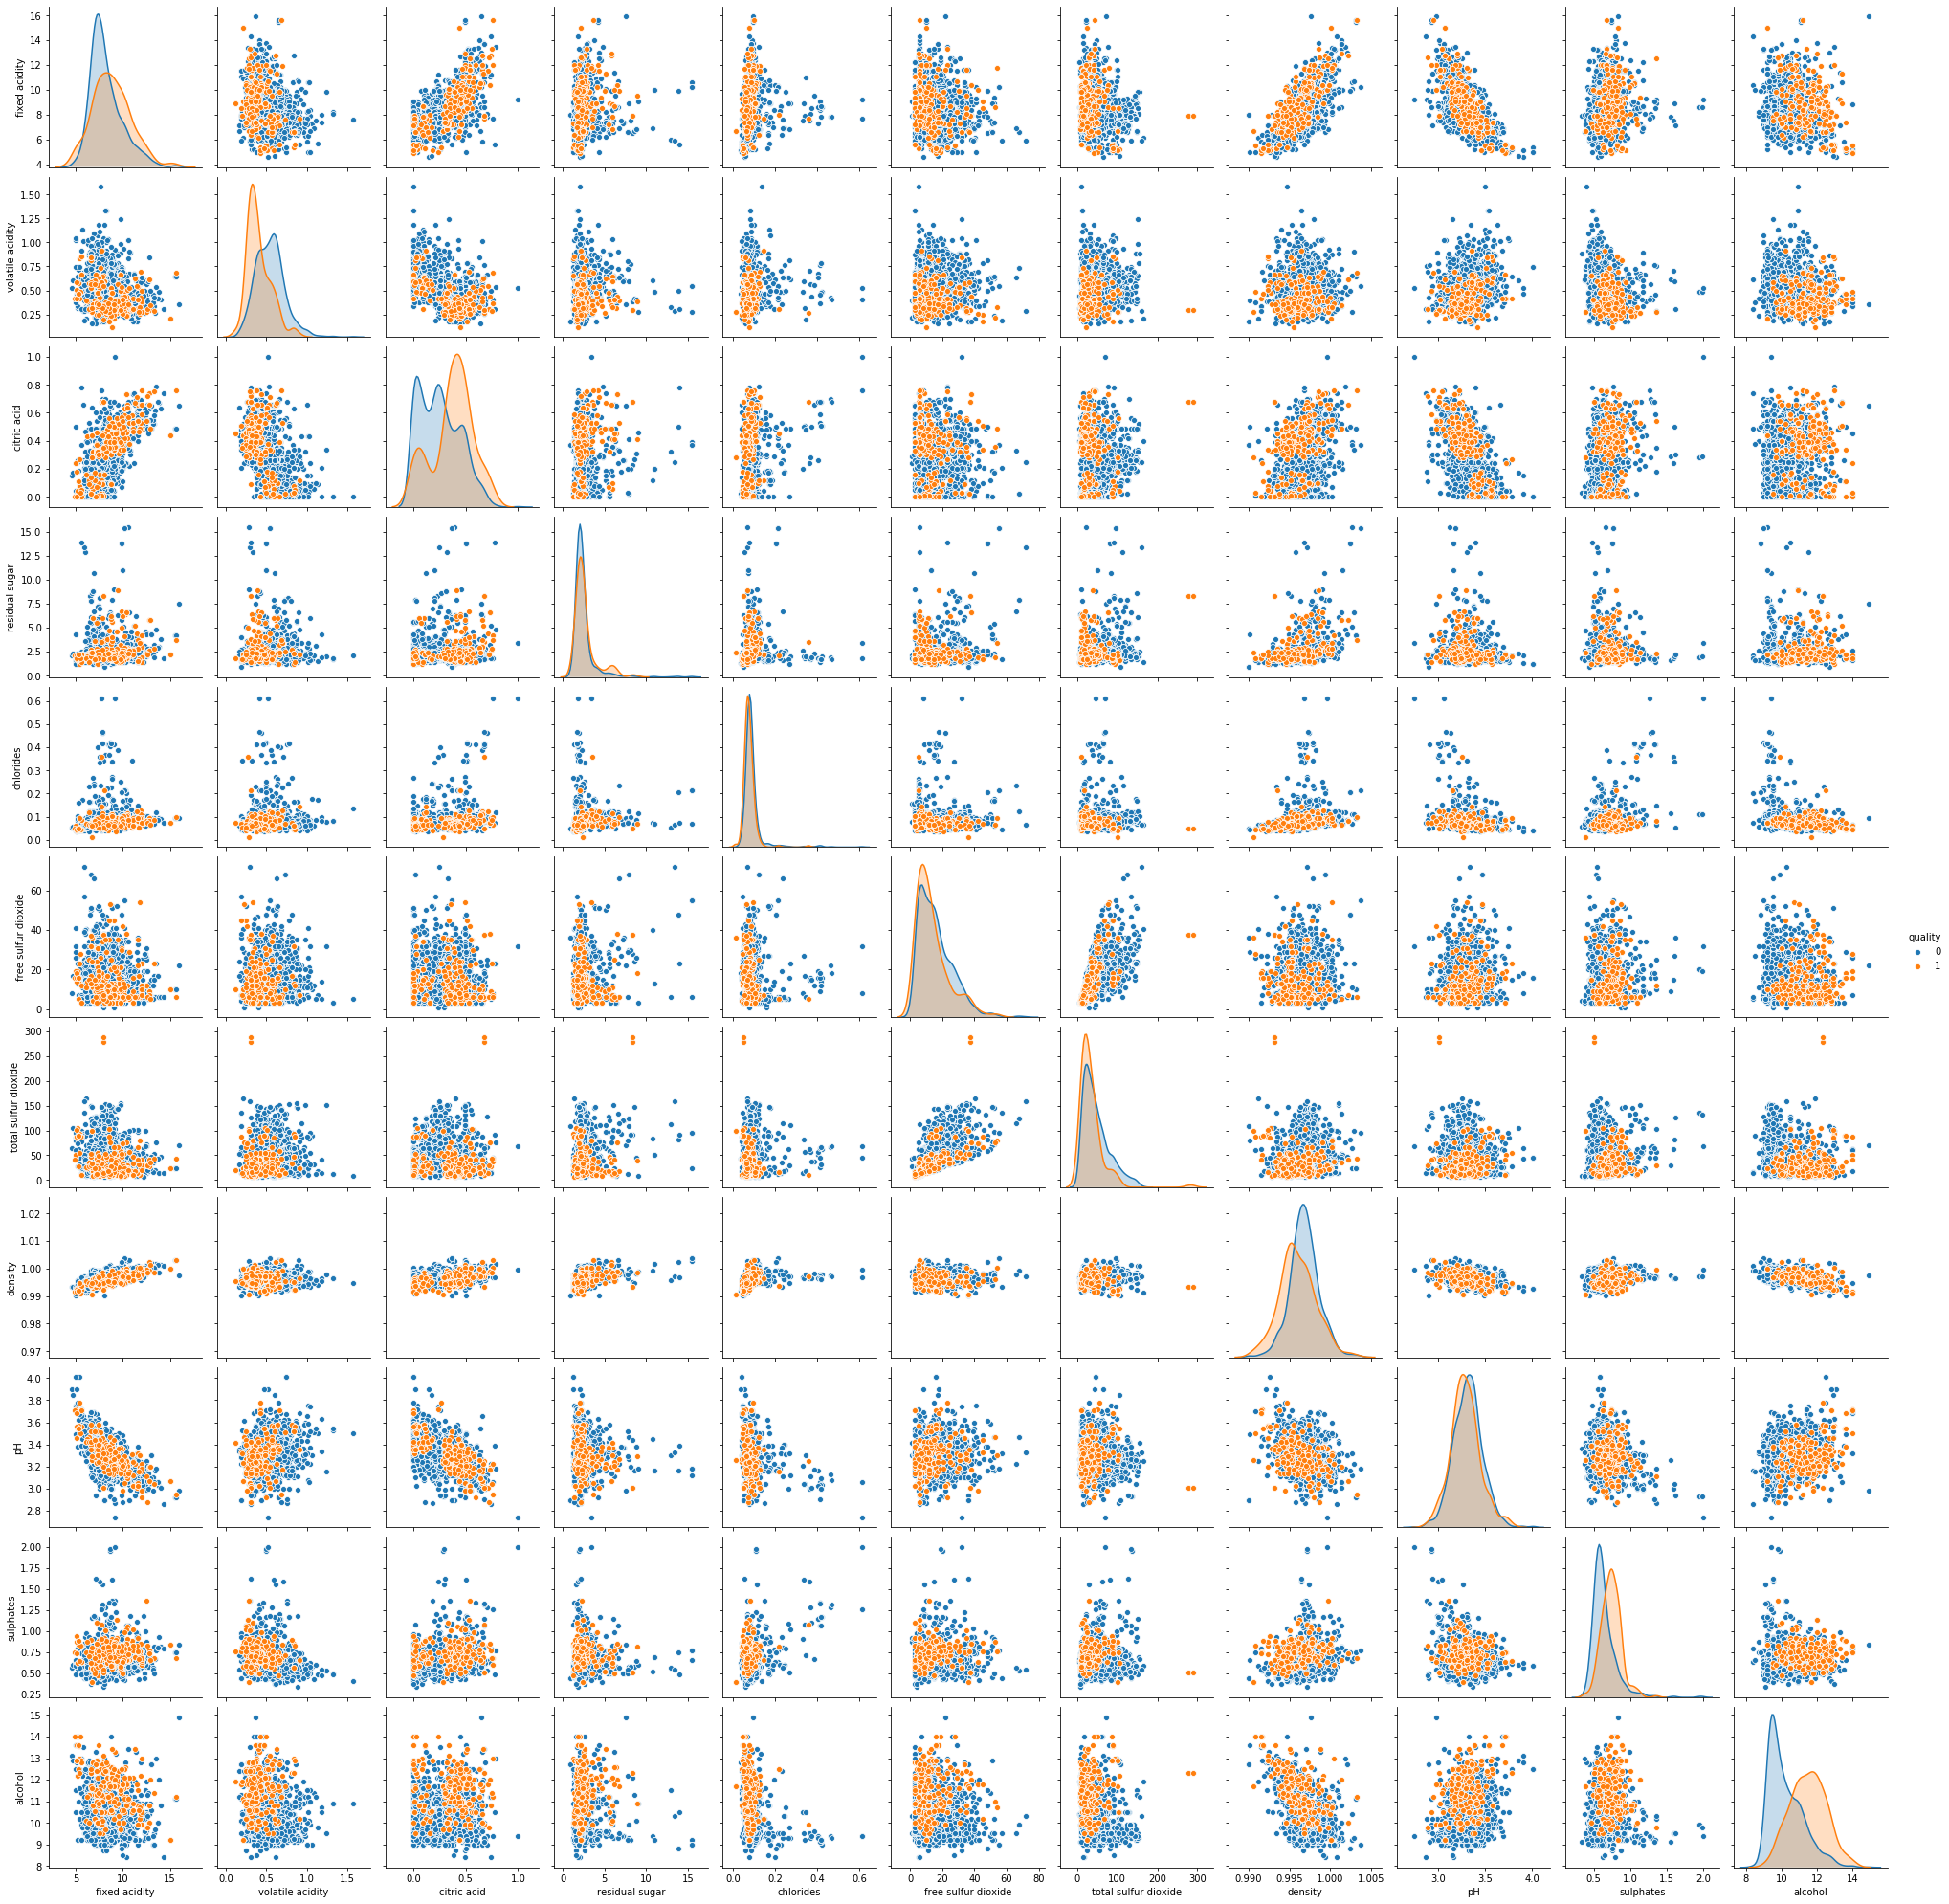

In [25]:
plt.figure(figsize=(5,5))
sns.pairplot(data, hue="quality")
plt.show()

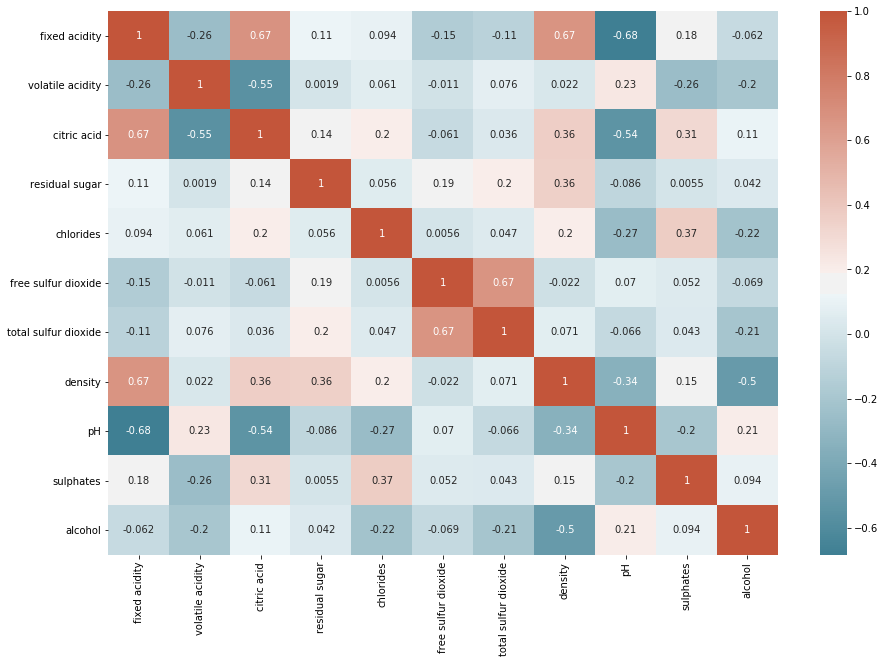

In [26]:
cols = data.columns[:-1]
plt.figure(figsize=(15,10))
sns.heatmap(data[cols].corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

##### From the above plot and matrix, we have :
>The following dimmensions are relatively highly correlated:
- total sulfur dioxide with free sulfur dioxide;
- fixed acidity with density and citric acid;

>The following dimmensions are relatively correlated:
- alcohol with quality (this might be a candidate for drop, since might be a leak);

>The following dimmensions are relativelly highly inverse correlated:
- fixed acidity with pH;

>The following dimmensions are relatively inverse correlated:
- citric acid with pH and volatile acidity

### Performance Analysis of various Classification Algorithms

##### NOTE : 
- We first perform the analysis without scaling the features. 
- We then, use MinMaxScaler() and StandardScaler() to perform the analysis. 
- We end the discussion by comparing the 3 Accuracy results obtained (WithoutScaling, MinMaxScaling, StandardScaling)

,Algorithm,Acc_Without_Scaling
0,Logistic_Regression,0.8775
1,Linear_SVM,0.8725
2,rbf_SVM,0.8725
3,K_Nearest_Neighbours,0.8625
4,Random_Forest,0.8750
5,Decision_Tree,0.8900
6,Gradient_Boosting,0.8800
7,XGBoost,0.8750
8,Linear_Discriminant_Analysis,0.8625
9,Gaussian_NB,0.8525


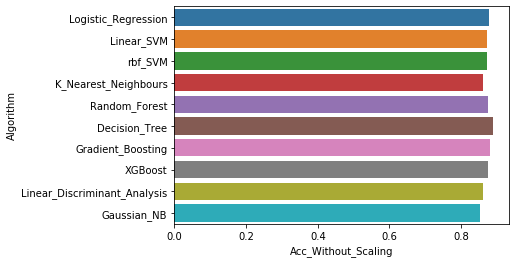

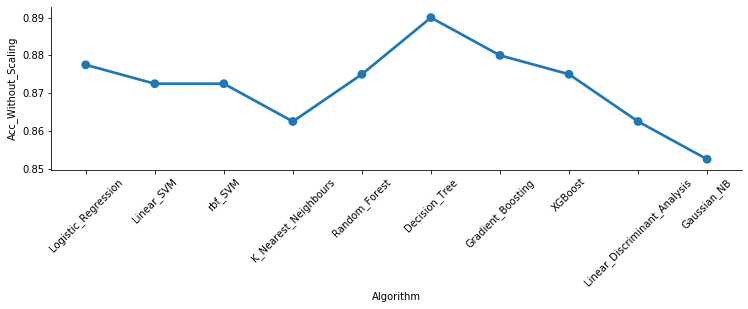

In [27]:
"""
Divide the Data into Training and testing data.
"""
x_train,x_test,y_train,y_test=train_test_split(data.drop('quality',axis=1),data['quality'],test_size=0.25,random_state=42)

models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        xgb.XGBClassifier(),
        LinearDiscriminantAnalysis(),
        GaussianNB()]

model_names=['Logistic_Regression',
             'Linear_SVM',
             'rbf_SVM',
             'K_Nearest_Neighbours',
             'Random_Forest',
             'Decision_Tree',
             'Gradient_Boosting',
             'XGBoost',
             'Linear_Discriminant_Analysis',
             'Gaussian_NB']

acc = []
results = {}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
results = {'Algorithm':model_names,'Acc_Without_Scaling':acc}
acc_table = pd.DataFrame(results)
display(acc_table)

sns.barplot(y='Algorithm',x='Acc_Without_Scaling',data=acc_table)
plt.show()

p = sns.factorplot(x='Algorithm',y='Acc_Without_Scaling',data=acc_table,kind='point',size=3,aspect=3.5)
p.set_xticklabels(rotation=45)
plt.show()

#### Scaling the Features

> Since features may have different scales, we perform scaling using both MinMaxScaler and StandardScaler to compare the results.

In [28]:
def scaled_analysis(X_train, X_test, y_train, y_test, name_scaler):
    """
    Trains and tests the model on scaled data.
    :param X_train: Training feature values.
    :param X_test: Testing feature values.
    :param y_train: Training target labels.
    :param y_test: Testing target labels.
    :name_scaler: Name of the Scaler used to scale the data.
    The Function stores the accuracies of each Modelling Algorithm in the acc_table dataframe.
    """
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),xgb.XGBClassifier(),
        LinearDiscriminantAnalysis(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        classification_model=models[model]
        classification_model.fit(X_train,y_train)
        pred=classification_model.predict(X_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_table[name_scaler]=np.array(acc_sc)

,Algorithm,Acc_Without_Scaling,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,Logistic_Regression,0.8775,0.8750,0.8775
1,Linear_SVM,0.8725,0.8825,0.8825
2,rbf_SVM,0.8725,0.8675,0.8900
3,K_Nearest_Neighbours,0.8625,0.8850,0.8950
4,Random_Forest,0.8750,0.9100,0.9025
5,Decision_Tree,0.8900,0.8950,0.8950
6,Gradient_Boosting,0.8800,0.8750,0.8750
7,XGBoost,0.8750,0.8750,0.8750
8,Linear_Discriminant_Analysis,0.8625,0.8625,0.8625
9,Gaussian_NB,0.8525,0.8425,0.8425


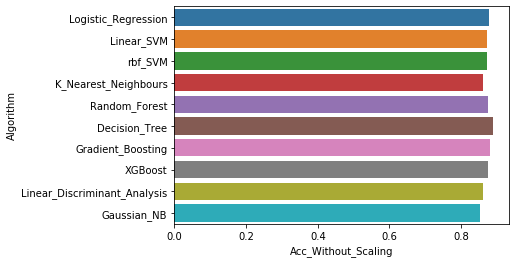

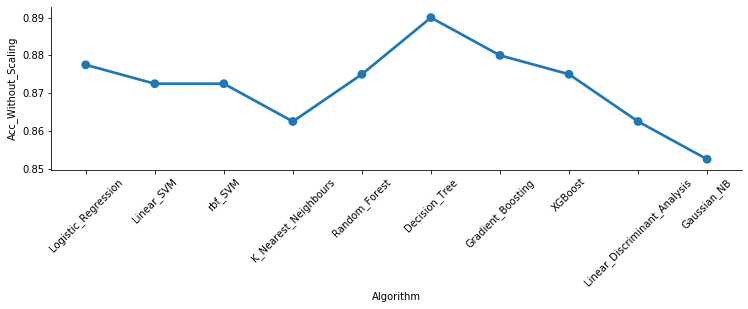

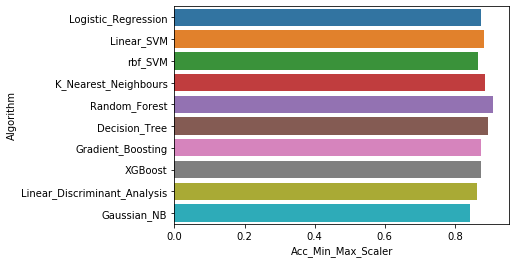

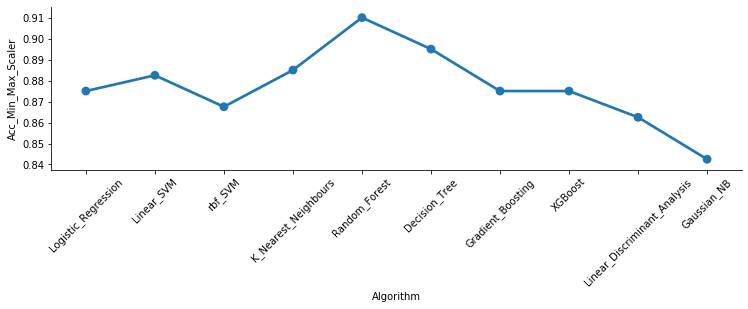

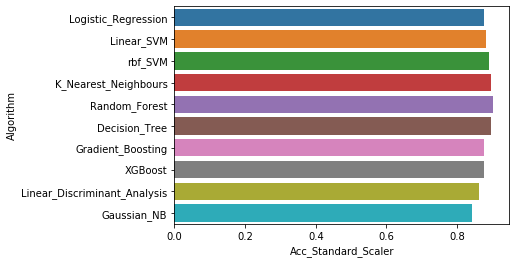

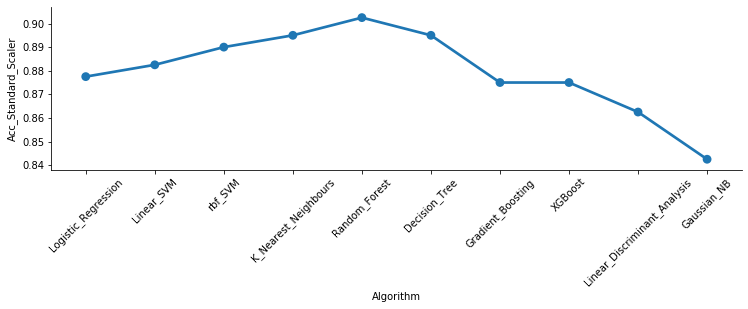

In [29]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(data)
    scaled_data=scaler.transform(data)
    X=scaled_data[:,0:11]
    Y=data['quality'].values
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    scaled_analysis(x_train,x_test,y_train,y_test,names[scale])
    
display(acc_table)

for column in acc_table.columns[1:]:
    sns.barplot(y='Algorithm',x=column,data=acc_table)
    plt.show()
    p = sns.factorplot(x='Algorithm',y=column,data=acc_table,kind='point',size=3,aspect=3.5)
    p.set_xticklabels(rotation=45)
    plt.show()

#### Conclusion

1. For most of the algorithms, the accuracies increase marginally on scaling. Also for this data, StandardScaling seems to give slightly better results than the MinMaxScaling.
2. Also, for some algorithms, there is a considerable increase in accuracies upon scaling the features like rbf SVM, K-Nearest Neighbours wheras for others there isn't a considerable increase in accuracies upon scaling.